Limpieza de Datos

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
from scipy.stats import f_oneway

Antes de iniciar cualquier proyecto de analisis de datos, es indispensable conocer la base de datos, que información tiene y que tipos de analisis podemos hacer con ella.

Para este primer caso nos centraremos en la base de datos de bank-full, evaluando algunas hipótesis iniciales de nuestros datos.


In [111]:
file_path = r'C:\Users\Carlos Andres\Desktop\Proy2\Limpieza de Datos\bank-full.csv'

# Leer el archivo CSV con el delimitador ";"
df = pd.read_csv(file_path, delimiter=';')

# Mostrar las primeras filas para verificar que se haya cargado correctamente
print(df.head())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [112]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Con el data.dtypes podemos observar el tipo de datos que tiene cada columna.

In [113]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [114]:
df.shape

(45211, 17)

data.shape nos muestra la cantidad de filas y columnas del DataFrame.

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [116]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Con el data.describe() obtenemlos esta tabla con la que analizamos el valor minimo, primer cuartil, mediana, media, tercer quartil y valor máximo de todas las variables cuantitativas.

In [117]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Con el data.isnull().sum() observamos que ninguna columna tiene datos faltantes

In [118]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

data.nunique() nos muestra la cantidad de valores únicos por columna.

Transformacion de Datos

La transformación de datos es el proceso de convertir datos de un formato o estructura a otro. Esto se hace para limpiar, estandarizar y preparar los datos para el análisis.

Variable Job

In [119]:
# Convertir la columna de tipo objeto a categórica
df['job'] = df['job'].astype('category')

# Verificar que la conversión fue exitosa
print(df['job'].dtypes)

#Ver las categorías asignadas
print(df['job'].cat.categories)

df.dtypes

category
Index(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'],
      dtype='object')


age             int64
job          category
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

Variable Marital

In [120]:
# Convertir la columna de tipo objeto a categórica
df['marital'] = df['marital'].astype('category')

# Verificar que la conversión fue exitosa
print(df['marital'].dtypes)

#Ver las categorías asignadas
print(df['marital'].cat.categories)

df.dtypes

category
Index(['divorced', 'married', 'single'], dtype='object')


age             int64
job          category
marital      category
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

Variable Education

In [121]:
# Convertir la columna de tipo objeto a categórica
df['education'] = df['education'].astype('category')

# Verificar que la conversión fue exitosa
print(df['education'].dtypes)

#Ver las categorías asignadas
print(df['education'].cat.categories)

df.dtypes

category
Index(['primary', 'secondary', 'tertiary', 'unknown'], dtype='object')


age             int64
job          category
marital      category
education    category
default        object
balance         int64
housing        object
loan           object
contact        object
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

Variable Default

In [122]:
# Convertir la columna original de tipo objeto a binaria: "yes" -> 1, "no" -> 0
df['default'] = df['default'].map({'yes': 1, 'no': 0})

# Verificar la conversión
print(df['default'].head())



0    0
1    0
2    0
3    0
4    0
Name: default, dtype: int64


In [123]:
na_count = df['default'].isnull().sum()
print(f'Número de valores nulos en la columna default: {na_count}')

Número de valores nulos en la columna default: 0


Variable housing

In [124]:
# Convertir la columna original de tipo objeto a binaria: "yes" -> 1, "no" -> 0
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})

# Verificar la conversión
print(df['housing'].head())


0    1
1    1
2    1
3    1
4    0
Name: housing, dtype: int64


In [125]:
na_count = df['housing'].isnull().sum()
print(f'Número de valores nulos en la columna housing: {na_count}')

Número de valores nulos en la columna housing: 0


Variable Loan

In [126]:
# Convertir la columna original de tipo objeto a binaria: "yes" -> 1, "no" -> 0
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})

# Verificar la conversión
print(df['loan'].head())

0    0
1    0
2    1
3    0
4    0
Name: loan, dtype: int64


In [127]:
na_count = df['loan'].isnull().sum()
print(f'Número de valores nulos en la columna housing: {na_count}')

Número de valores nulos en la columna housing: 0


In [128]:
df.dtypes

age             int64
job          category
marital      category
education    category
default         int64
balance         int64
housing         int64
loan            int64
contact        object
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

Variable Contact

In [129]:
# Convertir la columna de tipo objeto a categórica
df['contact'] = df['contact'].astype('category')

# Verificar que la conversión fue exitosa
print(df['contact'].dtypes)

#Ver las categorías asignadas
print(df['contact'].cat.categories)

df.dtypes

category
Index(['cellular', 'telephone', 'unknown'], dtype='object')


age             int64
job          category
marital      category
education    category
default         int64
balance         int64
housing         int64
loan            int64
contact      category
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

Variable Month

In [130]:
# Convertir la columna de tipo objeto a categórica
df['month'] = df['month'].astype('category')

# Verificar que la conversión fue exitosa
print(df['month'].dtypes)

#Ver las categorías asignadas
print(df['month'].cat.categories)

df.dtypes

category
Index(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep'],
      dtype='object')


age             int64
job          category
marital      category
education    category
default         int64
balance         int64
housing         int64
loan            int64
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

Variable poutcome

In [131]:
# Convertir la columna de tipo objeto a categórica
df['poutcome'] = df['poutcome'].astype('category')

# Verificar que la conversión fue exitosa
print(df['poutcome'].dtypes)

#Ver las categorías asignadas
print(df['poutcome'].cat.categories)

df.dtypes

category
Index(['failure', 'other', 'success', 'unknown'], dtype='object')


age             int64
job          category
marital      category
education    category
default         int64
balance         int64
housing         int64
loan            int64
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y              object
dtype: object

Variable Objetivo Y

In [132]:
# Convertir la columna original de tipo objeto a binaria: "yes" -> 1, "no" -> 0
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Verificar la conversión
print(df['y'].head())

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64


In [133]:
na_count = df['y'].isnull().sum()
print(f'Número de valores nulos en la columna y: {na_count}')

Número de valores nulos en la columna y: 0


In [134]:
df.dtypes

age             int64
job          category
marital      category
education    category
default         int64
balance         int64
housing         int64
loan            int64
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y               int64
dtype: object

In [135]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
# Convertir la columna original de tipo objeto a binaria: "yes" -> 1, "no" -> 0
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})

# Verificar la conversión
print(df['loan'].head())

0    0
1    0
2    1
3    0
4    0
Name: loan, dtype: int64


Revision de Transformacion de Variables

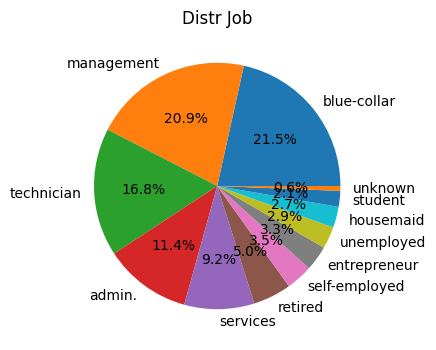

In [143]:
df['job'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Distr Job')
plt.ylabel('')
plt.show()

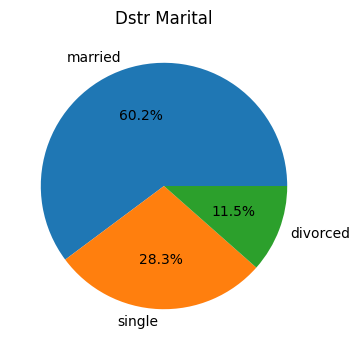

In [142]:
df['marital'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Dstr Marital')
plt.ylabel('')
plt.show()

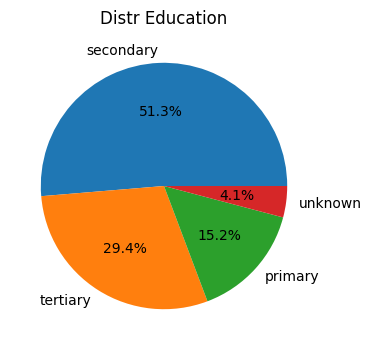

In [145]:
df['education'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Distr Education')
plt.ylabel('')
plt.show()

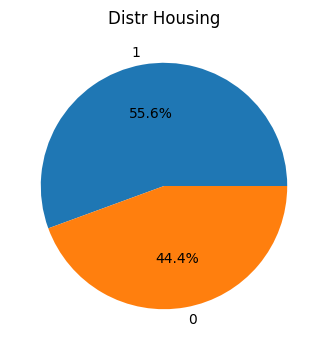

In [146]:
df['housing'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Distr Housing')
plt.ylabel('')
plt.show()

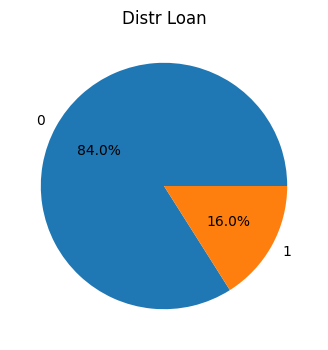

In [147]:
df['loan'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Distr Loan')
plt.ylabel('')
plt.show()

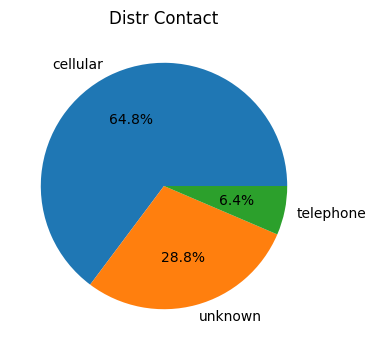

In [148]:
df['contact'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Distr Contact')
plt.ylabel('')
plt.show()

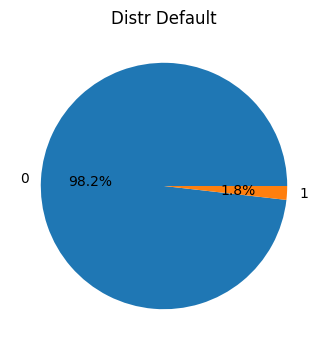

In [144]:
df['default'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Distr Default')
plt.ylabel('')
plt.show()

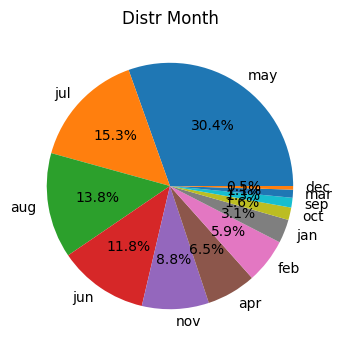

In [149]:
df['month'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Distr Month')
plt.ylabel('')
plt.show()

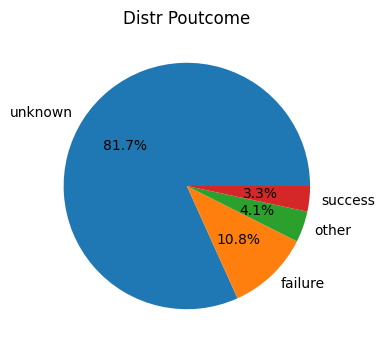

In [150]:
df['poutcome'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Distr Poutcome')
plt.ylabel('')
plt.show()

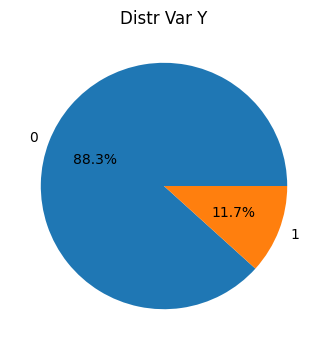

In [151]:
df['y'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Distr Var Y')
plt.ylabel('')
plt.show()

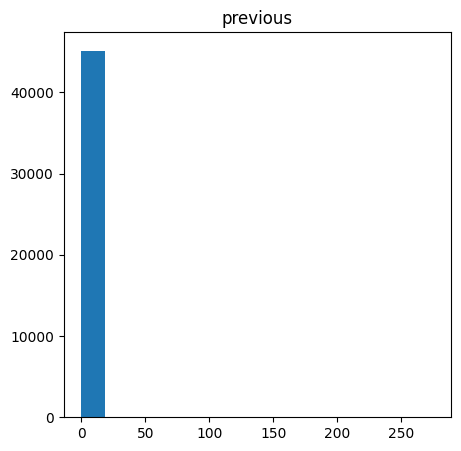

In [152]:
plt.figure(figsize = (5, 5))
plt.hist(df['previous'], bins = 15)
plt.title('previous')
plt.show()

Eliminar Variables

In [153]:
df = df.drop(['default', 'previous'], axis=1)

# Verificar que las columnas fueron eliminadas
print(df.head())

   age           job  marital  education  balance  housing  loan  contact  \
0   58    management  married   tertiary     2143        1     0  unknown   
1   44    technician   single  secondary       29        1     0  unknown   
2   33  entrepreneur  married  secondary        2        1     1  unknown   
3   47   blue-collar  married    unknown     1506        1     0  unknown   
4   33       unknown   single    unknown        1        0     0  unknown   

   day month  duration  campaign  pdays poutcome  y  
0    5   may       261         1     -1  unknown  0  
1    5   may       151         1     -1  unknown  0  
2    5   may        76         1     -1  unknown  0  
3    5   may        92         1     -1  unknown  0  
4    5   may       198         1     -1  unknown  0  


In [154]:
df.shape

(45211, 15)

In [155]:
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,poutcome,y
0,58,management,married,tertiary,2143,1,0,unknown,5,may,261,1,-1,unknown,0
1,44,technician,single,secondary,29,1,0,unknown,5,may,151,1,-1,unknown,0
2,33,entrepreneur,married,secondary,2,1,1,unknown,5,may,76,1,-1,unknown,0
3,47,blue-collar,married,unknown,1506,1,0,unknown,5,may,92,1,-1,unknown,0
4,33,unknown,single,unknown,1,0,0,unknown,5,may,198,1,-1,unknown,0


Revisar Duplicados


In [156]:
total_rows = df.shape[0]
total_rows

45211

In [157]:
duplicated_rows = df.loc[df.duplicated()].shape[0]
duplicated_rows

0

No existen dos filas que tengan exactamente los mismos datos

Nueva Base de datos con los Datos Limpios

In [158]:
file_path = 'Bank.csv'

# Use the to_csv method to save the DataFrame as a CSV file
df.to_csv(file_path, index=False) 